# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.columns.values

array(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'], dtype=object)

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


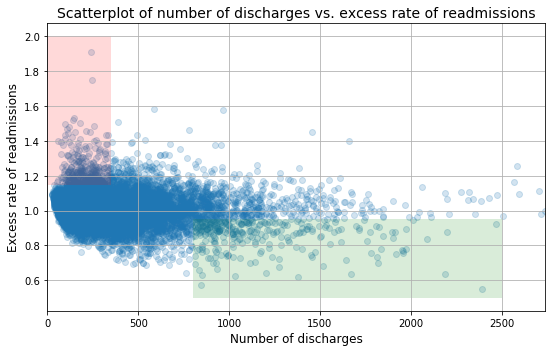

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn
#The first thing we will do is make sure there is not misssing data
clean_hospital_read_df.isnull().sum()
#The column footnote doesn't really seem to have any important data so we will just fill in the missing values for the other ones
#We will fill these values in with the overall mean
clean_hospital_read_df['Excess Readmission Ratio'] = clean_hospital_read_df['Excess Readmission Ratio'].fillna(np.mean(clean_hospital_read_df['Excess Readmission Ratio']))
clean_hospital_read_df['Predicted Readmission Rate'] = clean_hospital_read_df['Predicted Readmission Rate'].fillna(np.mean(clean_hospital_read_df['Predicted Readmission Rate']))
clean_hospital_read_df['Expected Readmission Rate'] = clean_hospital_read_df['Expected Readmission Rate'].fillna(np.mean(clean_hospital_read_df['Expected Readmission Rate']))
clean_hospital_read_df['Number of Readmissions'] = clean_hospital_read_df['Number of Readmissions'].fillna(np.mean(clean_hospital_read_df['Number of Readmissions']))

In [7]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [8]:
df = clean_hospital_read_df
df.shape

(11578, 12)

In [16]:
#Part A. 1:Rate of readmissions is trending down with increasing number of discharges
#To check this, we will see if there is a significant difference between the first half of the data and the second half.
half1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 1250]
half2= clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1250]
half1_mean = np.mean(half1['Predicted Readmission Rate'])
half1_std = np.std(half1['Predicted Readmission Rate'])
half2_mean = np.mean(half2['Predicted Readmission Rate'])
half2_std = np.std(half2['Predicted Readmission Rate'])
#our null hypothesis for this problem is that the difference between half1 mean and half 2 mean is statistically 0
#Our alternative hypothesis is that the difference between the two means is not 0
print(half1_mean, half1_std, half2_mean, half2_std)
#These numbers look pretty similar.  Each mean would fit within one standard deviation of the other set.
# a confidence interval

18.04246191119622 5.3651096147293815 15.062389380530973 8.79101268486026


In [17]:
print(half1.shape, half2.shape)

(11352, 12) (226, 12)


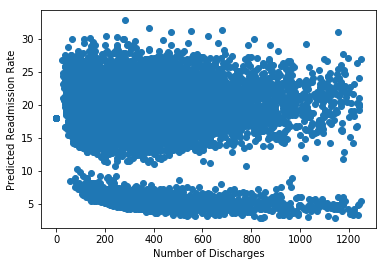

In [18]:
plt.scatter(half1['Number of Discharges'], half1['Predicted Readmission Rate'])
plt.xlabel('Number of Discharges')
plt.ylabel('Predicted Readmission Rate')
plt.show()

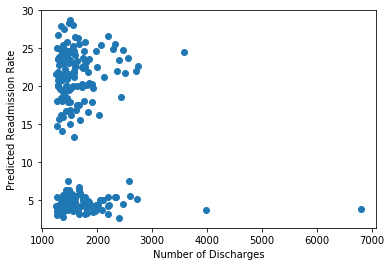

In [19]:
plt.scatter(half2['Number of Discharges'], half2['Predicted Readmission Rate'])
plt.xlabel('Number of Discharges')
plt.ylabel('Predicted Readmission Rate')
plt.show()
#Looking at these two plots, it doesn't look like there is any correlation between the predicted readmission rate and number
# of discharges.  It looks like there are two different groups of data in this problem though

In [20]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [21]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [22]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [23]:
perma = draw_perm_reps(half1['Predicted Readmission Rate'], half2['Predicted Readmission Rate'], func= diff_of_means, size=10000)

In [24]:
empirical_diff_means = diff_of_means(half1['Predicted Readmission Rate'], half2['Predicted Readmission Rate'])

In [25]:
p=np.sum(perma >= empirical_diff_means) / len(perma)
print('p-value = ', p)
#Based on our p-value of 0, we reject our null hypothesis that predicted admission rate for larger hospitals are the same
# as the predicted  values for hospitals with lower number of discharges

p-value =  0.0


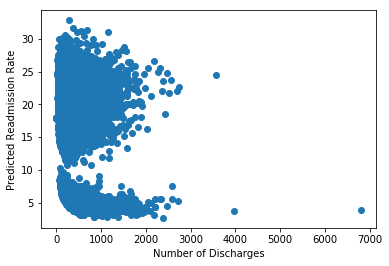

In [116]:
plt.scatter(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Predicted Readmission Rate'])
plt.xlabel('Number of Discharges')
plt.ylabel('Predicted Readmission Rate')
plt.show()
#Based on this chart, it looks like as hospitals have a higher number of discharges, they become less volatile and become
#more standrardized.  They are not the same as lower discharge hospitals though

In [26]:
#Part A.2: With lower number of dicharges, there is a greater incidence of excess rate of readmissions
#For this test, we will create two dataframes.  The first one will consist of hospitals with less than 500 discharges
# the second dataframe will consist of the overall data frame.
#Our null hypothesis is that the excess rate of readmissions is the same for low discharge hospitals and the rest
#We will generate permutations to create a sample mean and then check the p_value and create a 99% confidence interval
low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 500]
ldmean = np.mean(low_discharge['Excess Readmission Ratio'])
ldstd = np.std(low_discharge['Excess Readmission Ratio'])
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 500]
hd_mean = np.mean(high_discharge['Excess Readmission Ratio'])
hd_std = np.std(high_discharge['Excess Readmission Ratio'])
print(ldmean, ldstd, hd_mean, hd_std)
#These two means and standard deviations looks very similar.  Let's generate some permutations now

1.0110077573243328 0.08626959065577978 0.9954342418426129 0.1072351678098754


In [27]:
df_mean = np.mean(df['Excess Readmission Ratio'])
df_std = np.std(df['Excess Readmission Ratio'])
cipos = df_mean + (2.58 * (df_std/ (11578**0.5)))
cineg = df_mean - (2.58 * (df_std/ (11578**0.5)))
cipos, cineg, df_mean
#Based on our confidence interval, we are 99% certain that the mean value is between 1.0097 and 1.0053.
#This means that the high discharge hospitals are better than expected and the lower discharge hospitals are below average

(1.0097010294179194, 1.0053065377735098, 1.0075037835957146)

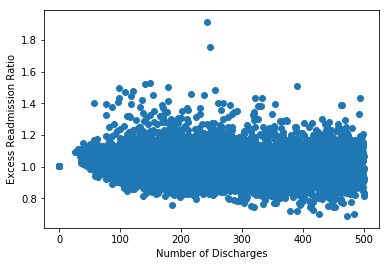

In [28]:
plt.scatter(low_discharge['Number of Discharges'], low_discharge['Excess Readmission Ratio'])
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()

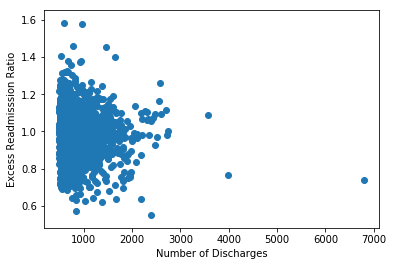

In [29]:
plt.scatter(high_discharge['Number of Discharges'],  high_discharge['Excess Readmission Ratio'])
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmisssion Ratio')
plt.show()

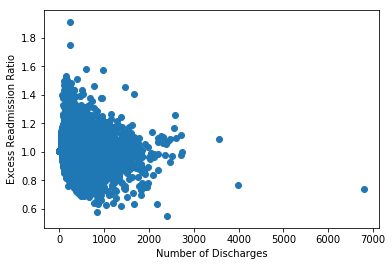

In [30]:
plt.scatter(df['Number of Discharges'], df['Excess Readmission Ratio'])
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()
#These three plots seem to show that the excess readmission ratio seems to homogenize as the discharge rates increase
#For hospitals with less than 750 discharges, there doesn't appear to be any relationship between capacity and err.

In [31]:
permb = draw_perm_reps(low_discharge['Excess Readmission Ratio'], high_discharge['Excess Readmission Ratio'], diff_of_means, 
                       size=10000)
empirical_diff_means = diff_of_means(low_discharge['Excess Readmission Ratio'], high_discharge['Excess Readmission Ratio'])
p=np.sum(permb>= empirical_diff_means) / len(permb)
print('p-value = ', p)
#Based on the p-value of 0.0021, we reject our null hyptothesis that high discharge and low discharge hospitals have the same
#excess readmission ratio rates
#We will also agree with the statement that there is a higher incidence rate in lower discharge hospitals

p-value =  0.0


In [32]:
#Part A.3: With higher number of discharges, there is a greater incidence of lower rates of readmissions
#We will create two separate data sets.  The first one will consist of hospitals with discharges above 750.
#The second column will consist of the rest of the data.  
#Our null hypothesis is that the difference of the means is statistically 0
#our alternative hypothesis is that the means are not equal to 0
low_discharge1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 750]
high_discharge1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 750]
ldmean1 = np.mean(low_discharge1['Excess Readmission Ratio'])
ldstd1 = np.std(low_discharge1['Excess Readmission Ratio'])
hdmean1 = np.mean(df['Excess Readmission Ratio'])
hdstd1 = np.std(df['Excess Readmission Ratio'])
ldmean1, ldstd1, hdmean1, hdstd1, df_mean, df_std

(1.009457013071332,
 0.08860237548420219,
 1.0075037835957146,
 0.09163802361107175,
 1.0075037835957146,
 0.09163802361107175)

In [33]:
cipos = df_mean + (2.58 * (df_std/(11578**0.5)))
cineg = df_mean - (2.58 * (df_std/(11578**0.5)))
cipos, cineg
#Based on our confidence intervl, we can be 99% certain that the population mean is between 1.0097 and 1.0053
#Based on this confidence interval, we see that that both mean values are within one standard deviation of the mean so there is
#not a significant difference between the high discharge hospitals and the rest

(1.0097010294179194, 1.0053065377735098)

In [34]:
permc = draw_perm_reps(low_discharge1['Excess Readmission Ratio'], high_discharge1['Excess Readmission Ratio'], diff_of_means, 
                       size=10000)
empirical_diff_means1 = diff_of_means(low_discharge1['Excess Readmission Ratio'], high_discharge1['Excess Readmission Ratio'])
p=np.sum(permc>= empirical_diff_means1) / len(permc)
print('p-value = ', p)

p-value =  0.0


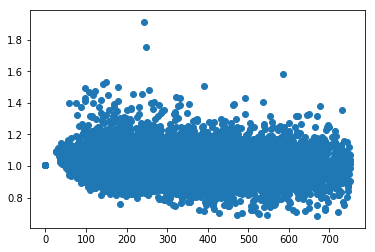

In [35]:
plt.scatter(low_discharge1['Number of Discharges'], low_discharge1['Excess Readmission Ratio'])
plt.show()

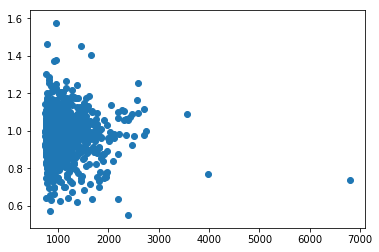

In [36]:
plt.scatter(high_discharge1['Number of Discharges'], high_discharge1['Excess Readmission Ratio'])
plt.show()

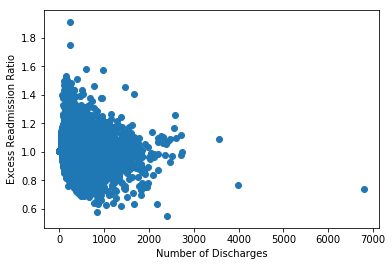

In [39]:
plt.scatter(df['Number of Discharges'], df['Excess Readmission Ratio'])
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.show()
#Once again, it looks like there are a lot of hospitals that are above and below 1 err and have below 1000 discharges.
#It looks like as hospitals have more discharges, they move closer to 1.
#We will say this claim is true
#They definitely do not seem to keep the same distribution
#

In [40]:
#PartB.1: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 
#63% have excess readmission rate greater than 1
discharge100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
discharge100.shape

(1269, 12)

In [41]:
discharge100_mean = np.mean(discharge100['Excess Readmission Ratio'])
discharge100_std = np.std(discharge100['Excess Readmission Ratio'])
discharge100_mean

1.0216535905998851

In [42]:
discharge100hrr = discharge100[discharge100['Excess Readmission Ratio'] > 1]
discharge100lrr = discharge100[discharge100['Excess Readmission Ratio'] <= 1]
discharge100hrr.shape

(832, 12)

In [43]:
discharge100lrr.shape

(437, 12)

In [84]:
832 / (832+437)
#It looks the mean we got from the dataset is 65.56%. This does not seem significantly different from 63%

0.6556343577620173

In [58]:
#B.2 In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 
#44% have excess readmission rate greater than 1
discharge1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
dischargeminus = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 1000]
discharge1000_mean = np.mean(discharge1000['Excess Readmission Ratio'])
dischargeminus_mean = np.mean(dischargeminus['Excess Readmission Ratio'])
discharge1000_mean, dischargeminus_mean

(0.9783354211663071, 1.0087215859700551)

In [59]:
perme = draw_perm_reps(discharge1000['Excess Readmission Ratio'], dischargeminus['Excess Readmission Ratio'], diff_of_means, 
                       size=10000)
empirical_diff_means1 = diff_of_means(discharge1000['Excess Readmission Ratio'], dischargeminus['Excess Readmission Ratio'])
p=np.sum(perme>= empirical_diff_means1) / len(perme)
print('p-value = ', p)
#Based on this p-value, we fail to reject the null that there is no statistically significant difference between hospitals
#with over 1000 discharges and hospitals with less than 1000 discharges

p-value =  1.0


In [60]:
#We will agree though that the mean is 0.978
discharge1000.shape

(463, 12)

In [67]:
d1000herr = discharge1000[discharge1000['Excess Readmission Ratio'] > 1]
d1000herr.shape

(206, 12)

In [68]:
206 / 463

0.4449244060475162

In [ ]:
#We will also agree that the mean readmission rate is 44%

In [103]:
#Part C.1: There is significant correlation between hospital capacity (number of discharges) and readmission rates
dfcorr = df.corr()
dfcorr['Number of Discharges']
#There appears to be a very strong correlation between number of readmissions and number of discharges which makes sense
#The other numbers appear to be uncorrelated with the predicted readmission rate

Provider Number              -0.009596
Number of Discharges          1.000000
Footnote                           NaN
Excess Readmission Ratio     -0.096924
Predicted Readmission Rate   -0.134505
Expected Readmission Rate    -0.130453
Number of Readmissions        0.787422
Name: Number of Discharges, dtype: float64

In [ ]:
#Part C.2: Smaller hospitals may be lacking necessary resources 
#Based on our results in part 1.B, there were a lot of smaller hospitals with high excess readmission ratios
#There were also a lot of small hospitals that didn't have this issue though

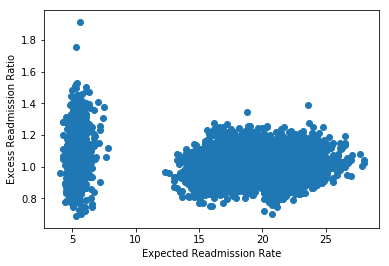

In [142]:
plt.scatter(low_discharge['Expected Readmission Rate'], low_discharge['Excess Readmission Ratio'])
plt.xlabel('Expected Readmission Rate')
plt.ylabel('Excess Readmission Ratio')
plt.show()
#Based on this plot, it looks like there are two distinct groups of low discharge hospitals
# The first is the ones with the higher expected Readmission rates.  This data seems pretty evenly distributed around 1
#with a bit of a skew towards above 1.  While there might be a funding problem with smaller hospitals, it looks like the 
#problem has more to do with a miscalculation of expected readmission rates.  

In [89]:
#Let's take a closer look at the hospitals with a lower expected readmission rate
lowerr = low_discharge[low_discharge['Expected Readmission Rate'] < 10]
lowerr_mean = np.mean(lowerr['Excess Readmission Ratio'])
lowerr_std = np.std(lowerr['Excess Readmission Ratio'])
lowerr_mean, lowerr_std, df_mean, df_std
#It looks like the mean for these lower expected readmission rate is much higher than the mean for the normal data set
#We will create a bootstrap sample of the data and see if there is a significant difference between this mean and the rest
#of the data

(1.0045777662948094,
 0.0722658433117155,
 1.0075037835957146,
 0.09163802361107175)

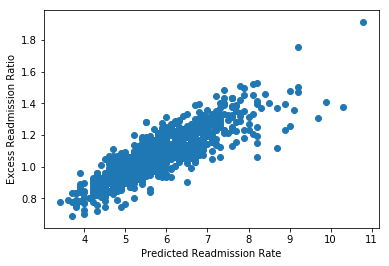

In [147]:
plt.scatter(lowerr['Predicted Readmission Rate'], lowerr['Excess Readmission Ratio'])
plt.xlabel('Predicted Readmission Rate')
plt.ylabel('Excess Readmission Ratio')
plt.show()

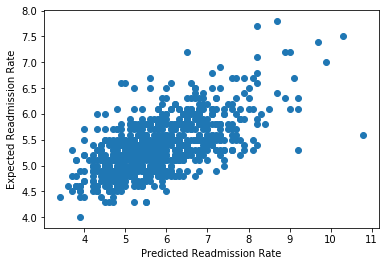

In [150]:
plt.scatter(lowerr['Predicted Readmission Rate'], lowerr['Expected Readmission Rate'])
plt.ylabel('Expected Readmission Rate')
plt.xlabel('Predicted Readmission Rate')
plt.show()

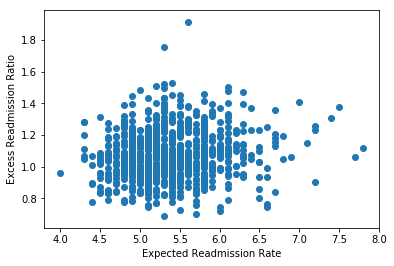

In [153]:
plt.scatter(lowerr['Expected Readmission Rate'], lowerr['Excess Readmission Ratio'])
plt.xlabel('Expected Readmission Rate')
plt.ylabel('Excess Readmission Ratio')
plt.show()
#Based on these charts, it looks like the problem with the lower discharge hospitals is that some of them have much higher
#predicted rates.  This could be caused by using less efficient procedures than bigger hospitals that have access to
#economies of scale.
#Some smaller hospitals may be lacking necessary resources to to ensure quality but definitely not all of them.  
#Specifically, it looks like there is a procedure or procedures that have a low average readmission rate but much higher 
#predicted rates of readmission.  These should be looked at more closely

In [154]:
lowerr.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,0.000222,NaN,0.008796,-0.031649,-0.075796,-0.018300
Number of Discharges,0.000222,1.000000,NaN,-0.480552,-0.528562,-0.289516,0.555736
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,0.008796,-0.480552,NaN,1.000000,0.855633,0.143245,0.408879
Predicted Readmission Rate,-0.031649,-0.528562,NaN,0.855633,1.000000,0.628198,0.345774
Expected Readmission Rate,-0.075796,-0.289516,NaN,0.143245,0.628198,1.000000,0.067960
Number of Readmissions,-0.018300,0.555736,NaN,0.408879,0.345774,0.067960,1.000000


In [90]:
#Part D.1: Hospitals with capacity below 300 should be required to demonstrate upgraded resource allocation
#We will treat the inefficient hospitals as outliers and compare the rest of hospitals with the rest of the hospitals
#Our null hypothesis will be that there is no difference between the two excess readmission ratio means
#Our alternative hypothesis will be that the hospitals with larger capacity have a significantly lower excess readmission ratio
discharge300 = df[df['Number of Discharges'] < 300]
discharge300clean = discharge300[discharge300['Expected Readmission Rate'] > 10]
dischargeplus = df[df['Number of Discharges'] >= 300]
discharge300_mean = np.mean(discharge300clean['Excess Readmission Ratio'])
discharge300_std = np.std(discharge300clean['Excess Readmission Ratio'])
dischargeplus_mean = np.mean(dischargeplus['Excess Readmission Ratio'])
dischargeplus_std = np.std(dischargeplus['Excess Readmission Ratio'])
discharge300_mean, discharge300_std, dischargeplus_mean, dischargeplus_std

(1.0053634629900108,
 0.06741507577201261,
 0.9998708480237513,
 0.1011088761383622)

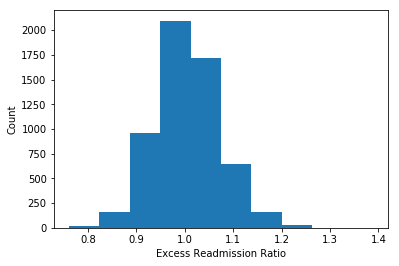

In [125]:
plt.hist(discharge300clean['Excess Readmission Ratio'])
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Count')
plt.show()

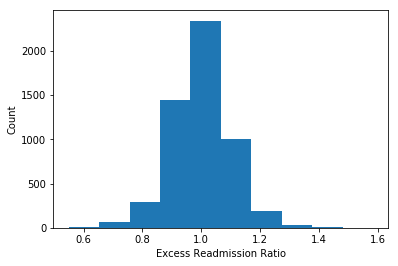

In [124]:
plt.hist(dischargeplus['Excess Readmission Ratio'])
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('Count')
plt.show()

In [95]:
permy = draw_perm_reps(discharge300clean['Excess Readmission Ratio'], dischargeplus['Excess Readmission Ratio'], diff_of_means, 
                       size=10000)
empirical_diff_means1 = diff_of_means(discharge300clean['Excess Readmission Ratio'], dischargeplus['Excess Readmission Ratio'])
p=np.sum(permy>= empirical_diff_means1) / len(permy)
print('p-value = ', p)
#Based on this p-value, there is still a significant difference between the low discharge hospitals and the higher discharge
#hospitals

p-value =  0.0002


In [96]:
#Part D.2: Hospital consolidation since they are more efficient
#To test if larger hospitals are more efficient, we will remove the inefficient lower discharge hospitals from the lower 
#discharge set and compare it with the rest of the data to see if they are significantly different
#Our null hypothesis will be that that the expected readmission ratios are the same
#Our alternative hypothesis will be that high discharge hospitals have a lower mean excess readmission rate than low 
#discharge hospitals
ld = low_discharge[low_discharge['Expected Readmission Rate'] > 10]
high_discharge = df[df['Number of Discharges'] > 1000]
ld_mean = np.mean(ld['Excess Readmission Ratio'])
ld_std = np.std(ld['Excess Readmission Ratio'])
hd_mean = np.mean(high_discharge['Excess Readmission Ratio'])
hd_std = np.std(high_discharge['Excess Readmission Ratio'])
ld_mean, ld_std, hd_mean, hd_std

(1.0045777662948094,
 0.0722658433117155,
 0.9783354211663071,
 0.11987768585552241)

In [97]:
permz = draw_perm_reps(ld['Excess Readmission Ratio'], high_discharge['Excess Readmission Ratio'], diff_of_means, 
                       size=10000)
empirical_diff_means1 = diff_of_means(ld['Excess Readmission Ratio'], high_discharge['Excess Readmission Ratio'])
p=np.sum(permz>= empirical_diff_means1) / len(permz)
print('p-value = ', p)
#Based on the p-value of 0, we can be 99% confident that low discharge hospitals are not as efficient as higher discharge
#hospitals.  
#However, there are still many small hospitals that have below average excess readmission ratios so it would also be
#helpful to take a look at what specific procedures are causing the increase in excess readmission ratio and why instead
#of blanket consolidation.

p-value =  0.0


In [109]:
df_dummies = df['Measure Name']

In [102]:
df_dummies.columns.values

array(['READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',
       'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP'], dtype=object)

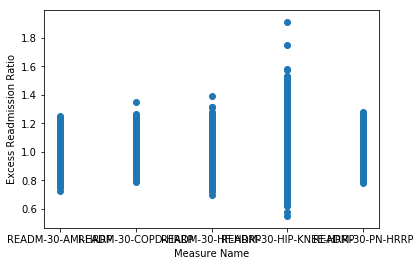

In [117]:
plt.scatter(df['Measure Name'], df['Excess Readmission Ratio'])
plt.xlabel('Measure Name')
plt.ylabel('Excess Readmission Ratio')
plt.show()

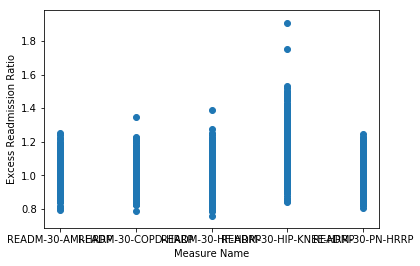

In [118]:
plt.scatter(discharge300['Measure Name'], discharge300['Excess Readmission Ratio'])
plt.xlabel('Measure Name')
plt.ylabel('Excess Readmission Ratio')
plt.show()

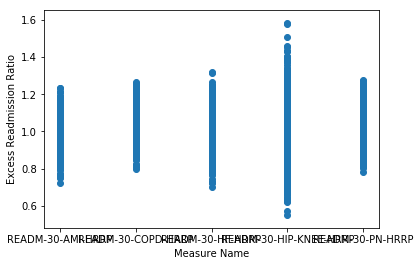

In [119]:
plt.scatter(dischargeplus['Measure Name'], dischargeplus['Excess Readmission Ratio'])
plt.xlabel('Measure Name')
plt.ylabel('Excess Readmission Ratio')
plt.show()

In [112]:
#After all of our testing, it looks like the biggest problems come from the hip knee replacement 
#The problem with the initial scatter plot is that it treats all hospitals like they do the exact same thing
#In reality, though, the hospitals doing lower risk procedures don't seem to face nearly the same high excess rates of readmission
#The above chart does a better job of breaking down the problem.
#They should also look at what the higher discharge hospitals are doing that causes the sub 0.8 rate of excess readmissions


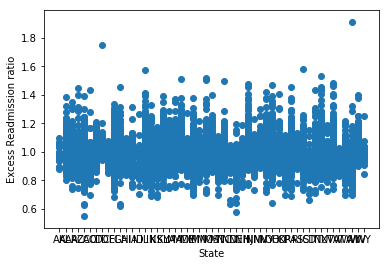

In [120]:
plt.scatter(df['State'], df['Excess Readmission Ratio'])
plt.xlabel('State')
plt.ylabel('Excess Readmission ratio')
plt.show()

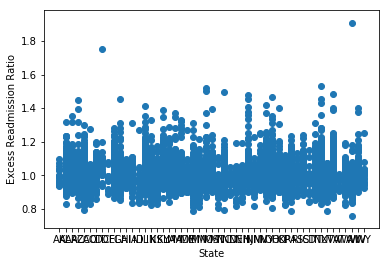

In [121]:
plt.scatter(discharge300['State'], discharge300['Excess Readmission Ratio'])
plt.xlabel('State')
plt.ylabel('Excess Readmission Ratio')
plt.show()

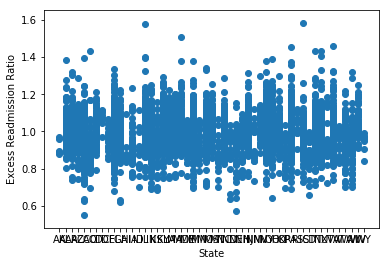

In [122]:
plt.scatter(dischargeplus['State'], dischargeplus['Excess Readmission Ratio'])
plt.xlabel('State')
plt.ylabel('Excess Readmission Ratio')
plt.show()

In [ ]:
#It looks like there might also be variation in the data by state.  
#Future analysis should also look into breaking down the data into rural vs urban when considering the last reccommentation 
#about consolidating information